In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# Load the iris dataset
iris = load_iris()

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

C:\Users\srira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\srira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\srira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\srira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

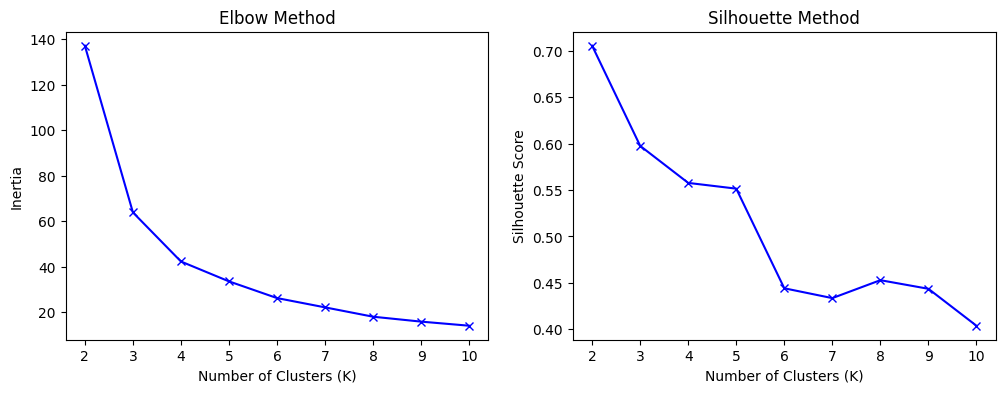

In [3]:
# Determine the value of K using the elbow method
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_pca, kmeans.labels_))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('Number of Clusters (K)')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Elbow Method')

ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('Number of Clusters (K)')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Method')

plt.show()


In [8]:
# Create an instance of the KMeans class with K=3
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X_pca)


C:\Users\srira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

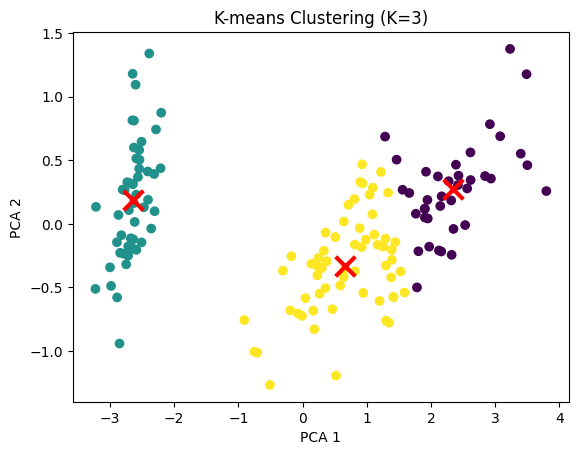

In [9]:
# Visualize the clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-means Clustering (K=3)')
plt.show()